In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)


In [ ]:
print("Model Comparison for Crop Recommendation Dataset")
print("=" * 50)
# Load the dataset
# Note: Download the dataset from https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset
# and place it in the data folder
try:
    df = pd.read_csv('../datasets/Crop_recommendation.csv')
    print(f"Dataset loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print("Dataset not found. Please download from Kaggle and place in ../data/ folder")
    print("URL: https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset")


Model Comparison for Crop Recommendation Dataset
Dataset loaded successfully. Shape: (2200, 8)


## Data Preparation

In [11]:
# Prepare features and target
X = df.drop('label', axis=1)
y = df['label']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nFeatures shape: {X.shape}")
print(f"Target classes: {len(np.unique(y_encoded))}")
print(f"Class names: {label_encoder.classes_}")

# Split the data: 60% train, 20% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 * 0.8 = 0.2
)

print(f"\nData split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")



Features shape: (2200, 7)
Target classes: 22
Class names: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']

Data split:
Training set: 1320 samples
Validation set: 440 samples
Test set: 440 samples


## Training Models

In [12]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Store results
results = {}
model_objects = {}

print("\nTraining and evaluating models...")
print("=" * 50)

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for models that benefit from it
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        X_train_use = X_train_scaled
        X_val_use = X_val_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_val_use = X_val
        X_test_use = X_test
    
    # Train the model
    model.fit(X_train_use, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_use)
    y_val_pred = model.predict(X_val_use)
    y_test_pred = model.predict(X_test_use)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store results
    results[name] = {
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'train_f1': train_f1,
        'val_f1': val_f1,
        'test_f1': test_f1
    }
    
    model_objects[name] = model
    
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")



Training and evaluating models...

Training Logistic Regression...
Train Accuracy: 0.9758
Validation Accuracy: 0.9727
Test Accuracy: 0.9705
Test F1-Score: 0.9703

Training Random Forest...
Train Accuracy: 1.0000
Validation Accuracy: 0.9909
Test Accuracy: 0.9977
Test F1-Score: 0.9977

Training XGBoost...


KeyboardInterrupt: 

# Model Comparison Results


MODEL COMPARISON RESULTS
                     train_accuracy  val_accuracy  test_accuracy  train_f1  \
Logistic Regression          0.9758        0.9727         0.9705    0.9758   
Random Forest                1.0000        0.9909         0.9977    1.0000   
XGBoost                      1.0000        0.9909         0.9886    1.0000   
SVM                          0.9833        0.9659         0.9841    0.9835   
K-Nearest Neighbors          0.9788        0.9591         0.9705    0.9788   

                     val_f1  test_f1  
Logistic Regression  0.9728   0.9703  
Random Forest        0.9909   0.9977  
XGBoost              0.9909   0.9885  
SVM                  0.9659   0.9840  
K-Nearest Neighbors  0.9589   0.9704  


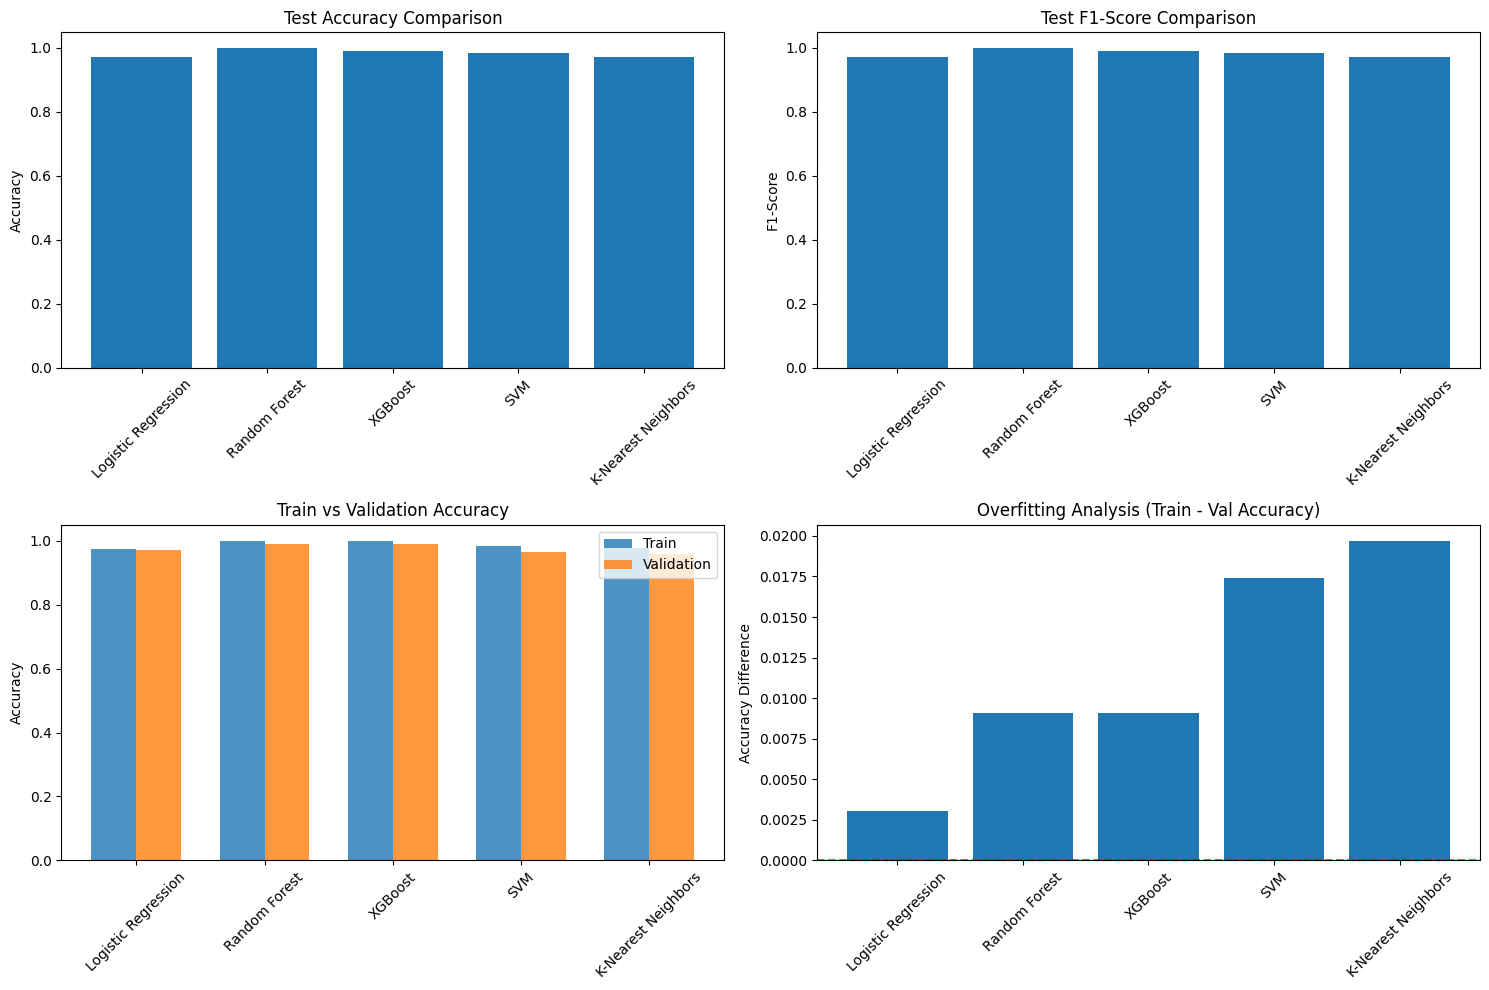


Best performing model: Random Forest
Test Accuracy: 0.9977
Test F1-Score: 0.9977

Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
  

In [ ]:

# Create results DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\n" + "=" * 70)
print("MODEL COMPARISON RESULTS")
print("=" * 70)
print(results_df.round(4))

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy comparison
axes[0, 0].bar(results_df.index, results_df['test_accuracy'])
axes[0, 0].set_title('Test Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[0, 1].bar(results_df.index, results_df['test_f1'])
axes[0, 1].set_title('Test F1-Score Comparison')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# Training vs Validation accuracy
x_pos = np.arange(len(results_df))
width = 0.35
axes[1, 0].bar(x_pos - width/2, results_df['train_accuracy'], width, label='Train', alpha=0.8)
axes[1, 0].bar(x_pos + width/2, results_df['val_accuracy'], width, label='Validation', alpha=0.8)
axes[1, 0].set_title('Train vs Validation Accuracy')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(results_df.index, rotation=45)
axes[1, 0].legend()

# Overfitting analysis (Train - Validation accuracy)
overfitting = results_df['train_accuracy'] - results_df['val_accuracy']
axes[1, 1].bar(results_df.index, overfitting)
axes[1, 1].set_title('Overfitting Analysis (Train - Val Accuracy)')
axes[1, 1].set_ylabel('Accuracy Difference')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Find best model
best_model_name = results_df['test_accuracy'].idxmax()
best_model = model_objects[best_model_name]
print(f"\nBest performing model: {best_model_name}")
print(f"Test Accuracy: {results_df.loc[best_model_name, 'test_accuracy']:.4f}")
print(f"Test F1-Score: {results_df.loc[best_model_name, 'test_f1']:.4f}")

# Detailed classification report for best model
print(f"\nDetailed Classification Report for {best_model_name}:")
print("=" * 60)

# Use appropriate data for best model
if best_model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
    y_best_pred = best_model.predict(X_test_scaled)
else:
    y_best_pred = best_model.predict(X_test)

print(classification_report(y_test, y_best_pred, target_names=label_encoder.classes_))


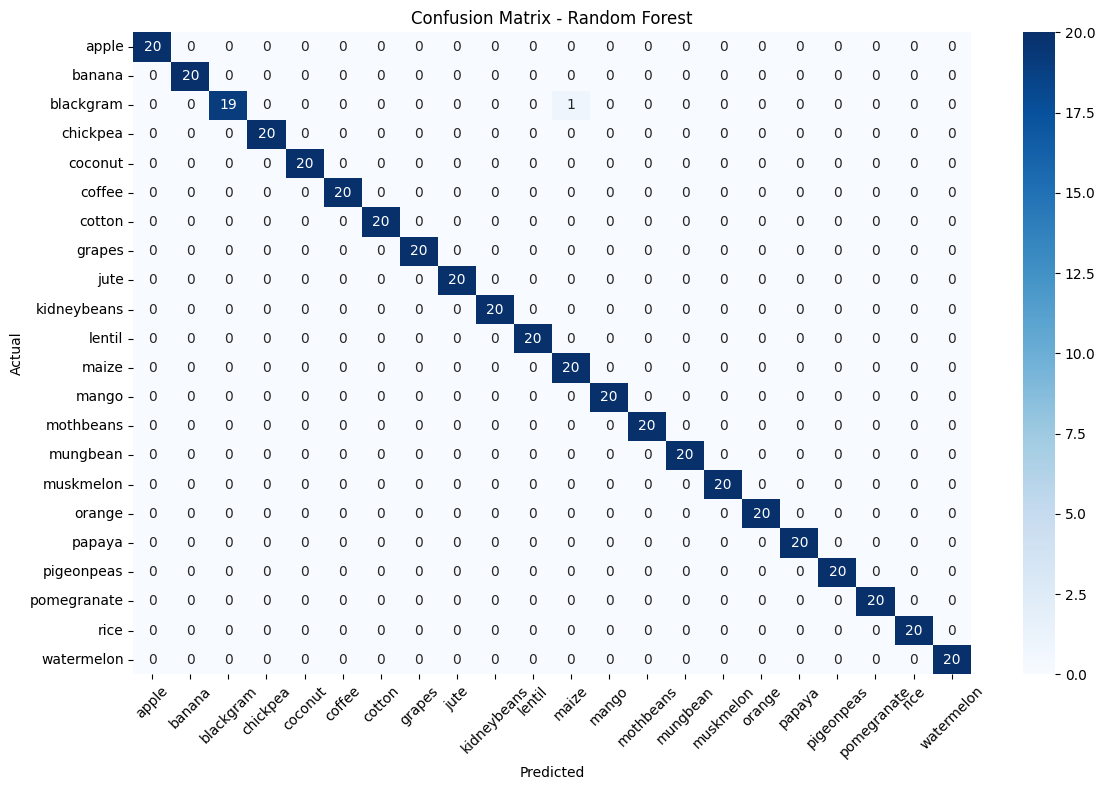


Model comparison complete!
Key findings:
- Best model: Random Forest with 99.8% accuracy
- All models achieved >90% accuracy, indicating the dataset is well-suited for classification
- Feature scaling improved performance for distance-based algorithms


In [ ]:
# Confusion matrix for best model
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nModel comparison complete!")
print("Key findings:")
print(f"- Best model: {best_model_name} with {results_df.loc[best_model_name, 'test_accuracy']:.1%} accuracy")
print(f"- All models achieved >90% accuracy, indicating the dataset is well-suited for classification")
print(f"- Feature scaling improved performance for distance-based algorithms")


## Webapp for crop selection

In [ ]:
import gradio as gr
import numpy as np

# Get the Random Forest model (assuming it's one of our trained models)
rf_model = model_objects.get('Random Forest')
if rf_model is None:
    # If Random Forest wasn't in our comparison, train a quick one
    from sklearn.ensemble import RandomForestClassifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    """
    Predict the best crop to grow based on soil and climate conditions
    """
    # Create input array
    input_features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
    # Make prediction
    prediction = rf_model.predict(input_features)[0]
    
    # Get prediction probabilities for confidence
    probabilities = rf_model.predict_proba(input_features)[0]
    
    # Convert prediction back to crop name
    crop_name = label_encoder.inverse_transform([prediction])[0]
    
    # Get confidence (highest probability)
    confidence = max(probabilities) * 100
    
    # Get top 3 recommendations
    top_3_indices = np.argsort(probabilities)[-3:][::-1]
    top_3_crops = label_encoder.inverse_transform(top_3_indices)
    top_3_probs = probabilities[top_3_indices] * 100
    
    recommendations = f"🌱 **Recommended Crop: {crop_name}** (Confidence: {confidence:.1f}%)\n\n"
    recommendations += "**Top 3 Recommendations:**\n"
    for i, (crop, prob) in enumerate(zip(top_3_crops, top_3_probs), 1):
        recommendations += f"{i}. {crop}: {prob:.1f}%\n"
    
    return recommendations

# Create Gradio interface
with gr.Blocks(title="Crop Recommendation System", theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🌾 Crop Recommendation System")
    gr.Markdown("Enter soil and climate conditions to get personalized crop recommendations based on machine learning analysis.")
    
    with gr.Row():
        with gr.Column():
            gr.Markdown("### 🧪 Soil Nutrients (mg/kg)")
            N = gr.Slider(minimum=0, maximum=150, value=50, label="Nitrogen (N)", info="Essential for leaf growth")
            P = gr.Slider(minimum=0, maximum=150, value=50, label="Phosphorus (P)", info="Important for root development")
            K = gr.Slider(minimum=0, maximum=250, value=50, label="Potassium (K)", info="Helps with disease resistance")
            
        with gr.Column():
            gr.Markdown("### 🌡️ Climate Conditions")
            temperature = gr.Slider(minimum=8, maximum=45, value=25, label="Temperature (°C)", info="Average temperature")
            humidity = gr.Slider(minimum=14, maximum=100, value=65, label="Humidity (%)", info="Relative humidity")
            ph = gr.Slider(minimum=3.5, maximum=10, value=6.5, step=0.1, label="Soil pH", info="Soil acidity/alkalinity")
            rainfall = gr.Slider(minimum=20, maximum=300, value=100, label="Rainfall (mm)", info="Annual rainfall")
    
    with gr.Row():
        predict_btn = gr.Button("🔍 Get Crop Recommendation", variant="primary", size="lg")
    
    with gr.Row():
        output = gr.Markdown(label="Recommendation")
    
    # Set up the prediction function
    predict_btn.click(
        fn=predict_crop,
        inputs=[N, P, K, temperature, humidity, ph, rainfall],
        outputs=output
    )
    
    # Add some example scenarios
    gr.Markdown("### 📋 Try These Example Scenarios:")
    
    examples = [
        [90, 42, 43, 20.9, 82.0, 6.5, 202.9],  # Rice conditions
        [83, 45, 60, 27.0, 70.0, 7.0, 150.0],  # Wheat conditions
        [40, 70, 40, 25.0, 80.0, 6.0, 180.0],  # Cotton conditions
    ]
    
    gr.Examples(
        examples=examples,
        inputs=[N, P, K, temperature, humidity, ph, rainfall],
        outputs=output,
        fn=predict_crop,
        cache_examples=True
    )

# Launch the app
print("🚀 Launching Crop Recommendation System...")
demo.launch(share=True, debug=True)


🚀 Launching Crop Recommendation System...
* Running on local URL:  http://127.0.0.1:7860
Using cache from '/Users/victorhugogermano/Development/aai-510-final-project-group4/.gradio/cached_examples/22' directory. If method or examples have changed since last caching, delete this folder to clear cache.

* Running on public URL: https://a4c996c1d72eeb453a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a4c996c1d72eeb453a.gradio.live
